In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 2: Navigate to the zip file
import os
zip_path = '/content/drive/MyDrive/archive (2).zip'  # Replace with your actual path

In [ ]:
# # Step 3: Extract the zip file
# import zipfile

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Attendance')  # Specify the extraction path


In [ ]:
#  #Verify the extracted files
#  extracted_path = '/content/drive/MyDrive/Attendance'
#  extracted_files = os.listdir(extracted_path)
#  print(extracted_files)

['Celebrity Faces Dataset']


In [3]:

# Verify the sub files
extracted_path_2 = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset'
extracted_files_2 = os.listdir(extracted_path_2)
print(extracted_files_2)

['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from collections import Counter


In [5]:
# Preprocess images
def preprocess_image(image_path, target_size=(160, 160)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float') / 255.0
    image = img_to_array(image)
    return image

In [6]:
def preprocess_dataset(dataset_path, target_size=(160, 160)):
    data = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                image = preprocess_image(image_path, target_size)
                label = root.split(os.path.sep)[-1]
                data.append(image)
                labels.append(label)
    return np.array(data), np.array(labels)

In [7]:
data, labels = preprocess_dataset(extracted_path_2)

In [142]:
# def preprocess_dataset(dataset_path, target_size=(160, 160)):
#     data = []
#     labels = []
#     class_count = {}

#     for root, dirs, files in os.walk(dataset_path):
#         for file in files:
#             if file.endswith(('jpg', 'jpeg', 'png')):
#                 image_path = os.path.join(root, file)
#                 image = preprocess_image(image_path, target_size)
#                 label = root.split(os.path.sep)[-1]

#                 data.append(image)
#                 labels.append(label)

#                 if label in class_count:
#                     class_count[label] += 1
#                 else:
#                     class_count[label] = 1

#     print(f"Class distribution: {class_count}")  # Ensure this is before the return statement
#     return np.array(data), np.array(labels)

In [131]:
# # Path to the dataset
# dataset_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset'

In [143]:
# # Load and preprocess dataset
# data, labels = preprocess_dataset(dataset_path)

Class distribution: {'Angelina Jolie': 100, 'Brad Pitt': 100, 'Denzel Washington': 100, 'Hugh Jackman': 100, 'Jennifer Lawrence': 100, 'Johnny Depp': 100, 'Kate Winslet': 100, 'Leonardo DiCaprio': 100, 'Megan Fox': 100, 'Natalie Portman': 100, 'Nicole Kidman': 100, 'Robert Downey Jr': 100, 'Sandra Bullock': 100, 'Scarlett Johansson': 100, 'Tom Cruise': 100, 'Tom Hanks': 100, 'Will Smith': 100}


In [8]:
def get_dataset_statistics(dataset_path):
    image_count = 0
    class_counter = Counter()
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_count += 1
                class_label = root.split(os.path.sep)[-1]
                class_counter[class_label] += 1

    total_classes = len(class_counter)
    return image_count, total_classes, class_counter

# Path to the extracted dataset
dataset_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset'

# Get dataset statistics
total_images, total_classes, class_distribution = get_dataset_statistics(dataset_path)

# Print dataset statistics
print(f'Total number of images: {total_images}')
print(f'Total number of unique classes: {total_classes}')
print(f'Class distribution: {class_distribution}')




Total number of images: 1700
Total number of unique classes: 17
Class distribution: Counter({'Angelina Jolie': 100, 'Brad Pitt': 100, 'Denzel Washington': 100, 'Hugh Jackman': 100, 'Jennifer Lawrence': 100, 'Johnny Depp': 100, 'Kate Winslet': 100, 'Leonardo DiCaprio': 100, 'Megan Fox': 100, 'Natalie Portman': 100, 'Nicole Kidman': 100, 'Robert Downey Jr': 100, 'Sandra Bullock': 100, 'Scarlett Johansson': 100, 'Tom Cruise': 100, 'Tom Hanks': 100, 'Will Smith': 100})


In [9]:
# Debug: Check unique labels and their count
unique_labels = np.unique(labels)
print(f'Unique labels before encoding: {unique_labels}')
print(f'Number of unique labels: {len(unique_labels)}')

Unique labels before encoding: ['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']
Number of unique labels: 17


In [107]:
# print(labels)

In [83]:
# from sklearn.preprocessing import LabelEncoder
# import pickle

In [94]:
# labels = ["Angelina Jolie", "Brad Pitt", "Denzel Washington", "Hugh Jackman", "Jennifer Lawrence",
#           "Johnny Depp", "Kate Winslet", "Leonardo DiCaprio", "Megan Fox", "Natalie Portman",
#           "Nicole Kidman", "Robert Downey Jr", "Sandra Bullock", "Scarlett Johansson",
#           "Tom Cruise", "Tom Hanks", "Will Smith"]


In [97]:
# label_encoder = LabelEncoder()
# label_encoder.fit(labels)

In [105]:
# with open('/content/drive/MyDrive/Attendance/label_encoder.pkl', 'wb') as file:
#     pickle.dump(label_encoder, file)

In [13]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [10]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [11]:
# Debug: Check unique encoded labels and their count
unique_encoded_labels = np.unique(labels)
print(f'Unique labels after encoding: {unique_encoded_labels}')
print(f'Number of unique encoded labels: {len(unique_encoded_labels)}')

Unique labels after encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of unique encoded labels: 17


In [14]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=num_classes)

In [15]:
labels.shape

(1700, 17)

In [16]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
labels.shape

(1700, 17)

In [18]:
# Save splits (optional)
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (1020, 160, 160, 3), (1020, 17)
Validation set: (340, 160, 160, 3), (340, 17)
Test set: (340, 160, 160, 3), (340, 17)


In [19]:
labels.shape

(1700, 17)

In [20]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16,EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
# Load the preprocessed data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


In [ ]:

# Normalize the input images (redundant step if already normalized during preprocessing)
# X_train = X_train.astype('float32') / 255.0
# X_val = X_val.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0

In [18]:
# Enhanced data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [23]:
# Determine the number of classes
num_classes = len(unique_labels)
print(f'Number of classes: {num_classes}')

Number of classes: 17


In [49]:
def create_transfer_learning_model(input_shape, num_classes):
    # Load the VGG16 model with pre-trained ImageNet weights
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(17, activation='softmax'))

    return model


# # Create the model
# input_shape = X_train.shape[1:]
# num_classes = y_train.shape[1]
# model = create_transfer_learning_model(input_shape, num_classes)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 batch_normalization_6 (Bat  (None, 5, 5, 512)         2048      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 256)              

In [50]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# # Define data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Fit the model using the augmented data generator
# datagen.fit(X_train)


In [51]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau


# history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
#                     validation_data=(X_val, y_val),
#                     epochs=50,
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])


In [53]:
pip install scikit-learn


In [ ]:
from sklearn.model_selection import KFold




# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
results = []

for train_index, val_index in kf.split(data):
    X_train, X_val = data[train_index], data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    model = create_transfer_learning_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train)

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        validation_data=(X_val, y_val),
                        epochs=100,
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_val, y_val)
    print(f'Fold {fold_no} - Test Loss: {test_loss} - Test Accuracy: {test_accuracy}')
    results.append((test_loss, test_accuracy))

    fold_no += 1

# Print overall results
avg_loss = np.mean([r[0] for r in results])
avg_accuracy = np.mean([r[1] for r in results])
print(f'Average Loss: {avg_loss}')
print(f'Average Accuracy: {avg_accuracy}')


Epoch 1/100
22/22 [==============================] - 27s 944ms/step - loss: 3.3725 - accuracy: 0.0912 - val_loss: 2.9283 - val_accuracy: 0.0941 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 11s 508ms/step - loss: 2.7546 - accuracy: 0.1706 - val_loss: 2.8069 - val_accuracy: 0.1265 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 10s 443ms/step - loss: 2.4360 - accuracy: 0.2537 - val_loss: 2.6968 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 4/100
13/22 [================>.............] - ETA: 3s - loss: 2.2068 - accuracy: 0.2832

In [ ]:
# Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train)




In [ ]:
# Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)



In [ ]:
 # Train the model
    history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        validation_data=(X_val, y_val),
                        epochs=100,
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])



In [ ]:
# Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_val, y_val)
    print(f'Fold {fold_no} - Test Loss: {test_loss} - Test Accuracy: {test_accuracy}')
    results.append((test_loss, test_accuracy))

    fold_no += 1

# Print overall results
avg_loss = np.mean([r[0] for r in results])
avg_accuracy = np.mean([r[1] for r in results])
print(f'Average Loss: {avg_loss}')
print(f'Average Accuracy: {avg_accuracy}')

11/11 [==============================] - 1s 70ms/step - loss: 1.7283 - accuracy: 0.3824
Test Loss: 1.728332757949829
Test Accuracy: 0.38235294818878174


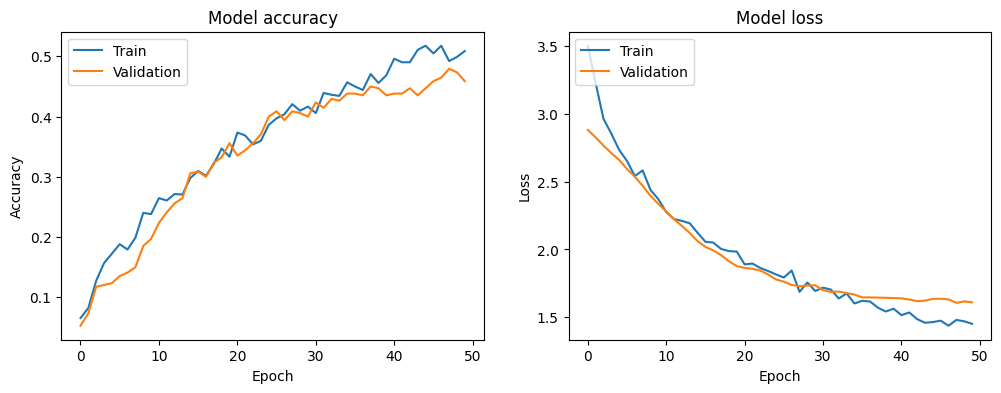

In [44]:
# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [29]:
 model.save('/content/drive/MyDrive/Attendance/best_model.h5')

In [30]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/Attendance/best_model.h5')

In [31]:
# Unfreeze some layers of the base model for fine-tuning
for layer in model.layers[0].layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True


In [32]:
# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])



In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('fine_tuned_model.h5', monitor='val_loss', save_best_only=True)

In [34]:
# Continue training the model
fine_tune_history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              validation_data=(X_val, y_val),
                              epochs=50,callbacks=[model_checkpoint, early_stopping]
                              )



Epoch 1/50
16/16 [==============================] - 11s 465ms/step - loss: 1.3428 - accuracy: 0.5529 - val_loss: 1.6930 - val_accuracy: 0.4529
Epoch 2/50
16/16 [==============================] - 8s 506ms/step - loss: 1.3730 - accuracy: 0.5373 - val_loss: 1.6997 - val_accuracy: 0.4559
Epoch 3/50
16/16 [==============================] - 8s 527ms/step - loss: 1.3034 - accuracy: 0.5608 - val_loss: 1.6574 - val_accuracy: 0.4676
Epoch 4/50
16/16 [==============================] - 7s 448ms/step - loss: 1.2857 - accuracy: 0.5725 - val_loss: 1.6160 - val_accuracy: 0.4676
Epoch 5/50
16/16 [==============================] - 9s 560ms/step - loss: 1.2136 - accuracy: 0.6206 - val_loss: 1.5745 - val_accuracy: 0.4912
Epoch 6/50
16/16 [==============================] - 7s 455ms/step - loss: 1.2462 - accuracy: 0.5765 - val_loss: 1.5629 - val_accuracy: 0.4853
Epoch 7/50
16/16 [==============================] - 7s 448ms/step - loss: 1.2267 - accuracy: 0.5961 - val_loss: 1.5493 - val_accuracy: 0.4882
Epoch

KeyboardInterrupt: 

In [29]:
# Merge history from initial training and fine-tuning
history.history.update(fine_tune_history.history)

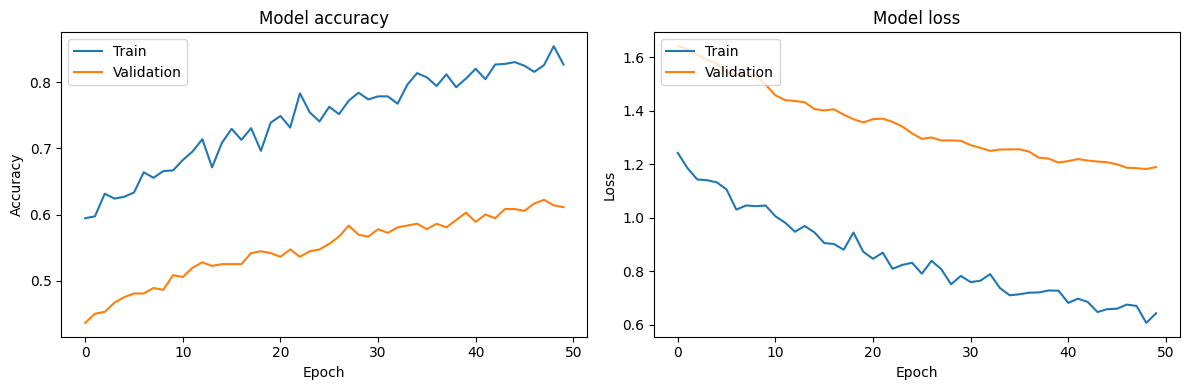

12/12 - 1s - loss: 1.2225 - accuracy: 0.5917 - 842ms/epoch - 70ms/step
Test Loss: 1.2225061655044556
Test Accuracy: 0.5916666388511658


In [30]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the history
plot_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [31]:

model.save('/content/drive/MyDrive/Attendance/fine_tuned_model.h5')


In [29]:
from tensorflow.keras.models import load_model

# Load the fine-tuned model from Google Drive
model = load_model('/content/drive/MyDrive/Attendance/fine_tuned_model.h5')


In [30]:
class_indices = {label: idx for idx, label in enumerate(unique_labels)}
print("Class Indices:", class_indices)

Class Indices: {'Angelina Jolie': 0, 'Brad Pitt': 1, 'Denzel Washington': 2, 'Hugh Jackman': 3, 'Jennifer Lawrence': 4, 'Johnny Depp': 5, 'Kate Winslet': 6, 'Leonardo DiCaprio': 7, 'Megan Fox': 8, 'Natalie Portman': 9, 'Nicole Kidman': 10, 'Robert Downey Jr': 11, 'Sandra Bullock': 12, 'Scarlett Johansson': 13, 'Tom Cruise': 14, 'Tom Hanks': 15, 'Will Smith': 16}


In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import pickle



In [67]:
# Step 1: Preprocess the Image
image_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset/Sandra Bullock/002_24fab375.jpg'
target_size = (160, 160)

In [68]:
img = load_img(image_path, target_size=target_size)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [69]:
# Step 2: Load the Model and Label Encoder
model_path = '/content/drive/MyDrive/Attendance/fine_tuned_model.h5'
label_encoder_path = '/content/drive/MyDrive/Attendance/label_encoder.pkl'

In [70]:
model = load_model(model_path)

In [71]:
with open(label_encoder_path, 'rb') as file:
    label_encoder = pickle.load(file)

In [72]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)
print(f"Predicted label: {predicted_label[0]}")

1/1 [==============================] - 0s 474ms/step
Predicted label: Megan Fox


In [73]:
from collections import Counter

# Assuming labels are already encoded
class_distribution = Counter(labels)
print("Class distribution:", class_distribution)


Class distribution: Counter({'Scarlett Johansson': 200, 'Angelina Jolie': 100, 'Brad Pitt': 100, 'Denzel Washington': 100, 'Hugh Jackman': 100, 'Jennifer Lawrence': 100, 'Johnny Depp': 100, 'Kate Winslet': 100, 'Leonardo DiCaprio': 100, 'Megan Fox': 100, 'Natalie Portman': 100, 'Nicole Kidman': 100, 'Robert Downey Jr': 100, 'Sandra Bullock': 100, 'Tom Cruise': 100, 'Tom Hanks': 100, 'Will Smith': 100})


12/12 [==============================] - 111s 9s/step


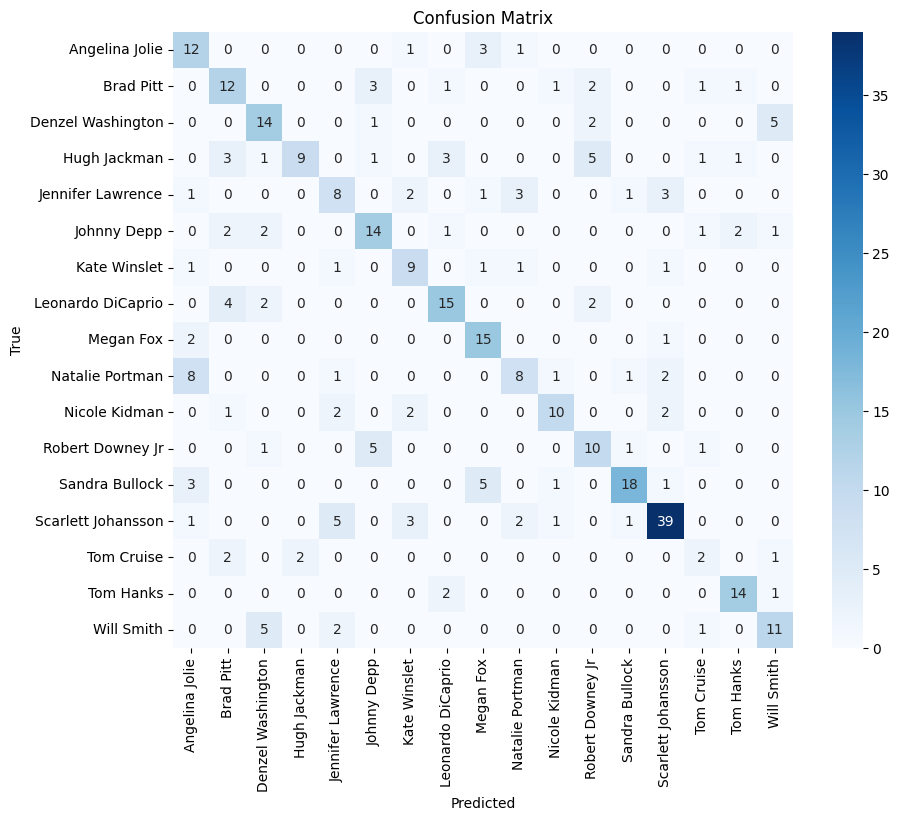

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [46]:
# # Step 1: Load the Image
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# img_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset/Megan Fox/004_6aede3d3.jpg'
# target_size = (160, 160)
# img = load_img(img_path, target_size=target_size)



In [26]:
# # Step 2: Convert the Image to an Array
# img_array = img_to_array(img)



In [27]:
# # Step 3: Expand Dimensions
# img_array = np.expand_dims(img_array, axis=0)



In [28]:
# # Step 4: Preprocess the Image
# img_array = preprocess_input(img_array)



In [29]:
# # Now img_array is ready to be used as input to a neural network model
# print(img_array.shape)  # Output should be (1, 160, 160, 3)

(1, 160, 160, 3)


In [41]:
# from tensorflow.keras.models import load_model

# # Specify the path to your saved model
# model_path = '/content/drive/MyDrive/Attendance/fine_tuned_model.h5'

# # Load the model
# model1 = load_model(model_path)

# # Continue with further processing (e.g., making predictions)



In [84]:
# # Get the class indices from the training generator (replace with your actual class indices)
# class_indices = {'class1': 0, 'class2': 1, 'class3': 2}  # Replace with your actual class indices

In [35]:
# Example path to an image in your dataset
img_path = '/content/drive/MyDrive/Attendance/Celebrity Faces Dataset/Sandra Bullock/002_24fab375.jpg'